In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_column", None)
pd.set_option("display.max_rows", None)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df= pd.read_csv("/content/cars_24_combined.csv")
df.head(10)

,Unnamed: 0,Car Name,Year,Distance,Owner,Fuel,Location,Drive,Type,Price
0,0,Maruti S PRESSO,2022.0,3878,1,PETROL,HR-98,Manual,HatchBack,514000
1,1,Hyundai Xcent,2018.0,32041,1,PETROL,TN-22,Manual,Sedan,674000
2,2,Tata Safari,2021.0,96339,1,DIESEL,TS-08,Automatic,SUV,1952000
3,3,Maruti Vitara Brezza,2019.0,51718,1,DIESEL,WB-24,Manual,SUV,690000
4,4,Tata Tiago,2021.0,19811,1,PETROL,HR-51,Manual,HatchBack,526000
5,5,Maruti Swift,2017.0,70129,1,PETROL,MH-14,Manual,HatchBack,552000
6,6,Hyundai i20,2012.0,103781,1,PETROL,NaN,Manual,HatchBack,278000
7,7,Renault Kwid,2021.0,31945,2,PETROL,UP-32,Automatic,HatchBack,518000
8,8,Hyundai Grand i10,2015.0,39950,1,PETROL,HR-26,Manual,HatchBack,443000
9,9,Maruti Swift,2018.0,56697,1,DIESEL,KA-04,Automatic,HatchBack,710350


In [ ]:
df.head()

,Unnamed: 0,Car Name,Year,Distance,Owner,Fuel,Location,Drive,Type,Price
0,0,Maruti S PRESSO,2022.0,3878,1,PETROL,HR-98,Manual,HatchBack,514000
1,1,Hyundai Xcent,2018.0,32041,1,PETROL,TN-22,Manual,Sedan,674000
2,2,Tata Safari,2021.0,96339,1,DIESEL,TS-08,Automatic,SUV,1952000
3,3,Maruti Vitara Brezza,2019.0,51718,1,DIESEL,WB-24,Manual,SUV,690000
4,4,Tata Tiago,2021.0,19811,1,PETROL,HR-51,Manual,HatchBack,526000


In [ ]:
df.tail()

,Unnamed: 0,Car Name,Year,Distance,Owner,Fuel,Location,Drive,Type,Price
8010,8010,Datsun Redi Go,2018.0,11500,1,PETROL,MH-01,Manual,HatchBack,292000
8011,8011,Toyota YARIS,2018.0,73393,2,PETROL,KA-03,Manual,Sedan,534000
8012,8012,Volkswagen Ameo,2016.0,83810,2,PETROL,UP-78,Manual,Sedan,424000
8013,8013,Hyundai GRAND I10 NIOS,2019.0,39162,1,PETROL,CH-01,Automatic,HatchBack,685000
8014,8014,Tata TIGOR,2022.0,82009,2,PETROL,MH-02,Manual,Sedan,392000


In [ ]:
df.dtypes

,0
Unnamed: 0,int64
Car Name,object
Year,float64
Distance,int64
Owner,int64
Fuel,object
Location,object
Drive,object
Type,object
Price,int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8015 entries, 0 to 8014
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8015 non-null   int64  
 1   Car Name    8014 non-null   object 
 2   Year        8014 non-null   float64
 3   Distance    8015 non-null   int64  
 4   Owner       8015 non-null   int64  
 5   Fuel        8015 non-null   object 
 6   Location    7802 non-null   object 
 7   Drive       8015 non-null   object 
 8   Type        8015 non-null   object 
 9   Price       8015 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 626.3+ KB


In [ ]:
df.describe()

,Unnamed: 0,Year,Distance,Owner,Price
count,8015.000000,8014.000000,8015.000000,8015.000000,8.015000e+03
mean,4007.000000,2016.995009,52621.411728,1.300187,5.748829e+05
std,2313.875537,2.861454,29182.922728,0.510893,2.651049e+05
min,0.000000,2010.000000,0.000000,1.000000,1.190000e+05
25%,2003.500000,2015.000000,30730.000000,1.000000,3.930000e+05
50%,4007.000000,2017.000000,50359.000000,1.000000,5.350000e+05
75%,6010.500000,2019.000000,71762.000000,2.000000,6.980000e+05
max,8014.000000,2023.000000,971212.000000,4.000000,3.300000e+06


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
Car Name,1
Year,1
Distance,0
Owner,0
Fuel,0
Location,213
Drive,0
Type,0
Price,0


In [ ]:
mean_encoded = df.groupby('Car Name')['Price'].mean()
df['Car Name'] = df['Car Name'].map(mean_encoded)
print(mean_encoded)

Car Name
BMW 3 Series               1.005000e+06
Datsun Go                  3.197333e+05
Datsun Go Plus             4.291000e+05
Datsun Redi Go             3.139600e+05
Ford Ecosport              7.165261e+05
Ford Endeavour             2.192000e+06
Ford FREESTYLE             5.865625e+05
Ford Figo Aspire           7.795000e+05
Ford New Figo              6.343750e+05
Honda Accord               1.900000e+05
Honda Amaze                6.019068e+05
Honda BR-V                 8.208750e+05
Honda Brio                 3.415589e+05
Honda CRV                  9.191667e+05
Honda City                 6.705301e+05
Honda Civic                9.789091e+05
Honda Jazz                 5.854810e+05
Honda WR-V                 7.225793e+05
Hyundai ALCAZAR            1.917600e+06
Hyundai AURA               7.028076e+05
Hyundai Creta              9.676814e+05
Hyundai Elite i20          6.092592e+05
Hyundai Eon                2.826204e+05
Hyundai GRAND I10 NIOS     6.696875e+05
Hyundai Grand i10          4.77

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Fuel'] = le.fit_transform(df['Fuel'])

In [ ]:
df.head(10)

,Unnamed: 0,Car Name,Year,Distance,Owner,Fuel,Location,Drive,Type,Price
0,0,4.626300e+05,2022.0,3878,1,3,HR-98,Manual,HatchBack,514000
1,1,5.752810e+05,2018.0,32041,1,3,TN-22,Manual,Sedan,674000
2,2,1.910125e+06,2021.0,96339,1,1,TS-08,Automatic,SUV,1952000
3,3,7.752325e+05,2019.0,51718,1,1,WB-24,Manual,SUV,690000
4,4,5.319481e+05,2021.0,19811,1,3,HR-51,Manual,HatchBack,526000
5,5,5.054588e+05,2017.0,70129,1,3,MH-14,Manual,HatchBack,552000
6,6,3.376471e+05,2012.0,103781,1,3,NaN,Manual,HatchBack,278000
7,7,3.961258e+05,2021.0,31945,2,3,UP-32,Automatic,HatchBack,518000
8,8,4.772429e+05,2015.0,39950,1,3,HR-26,Manual,HatchBack,443000
9,9,5.054588e+05,2018.0,56697,1,1,KA-04,Automatic,HatchBack,710350


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Drive'] = le.fit_transform(df['Drive'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Type'] = le.fit_transform(df['Type'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Location'] = le.fit_transform(df['Location'])

In [ ]:
df.head(5)

,Unnamed: 0,Car Name,Year,Distance,Owner,Fuel,Location,Drive,Type,Price
0,0,4.626300e+05,2022.0,3878,1,3,102,1,0,514000
1,1,5.752810e+05,2018.0,32041,1,3,313,1,4,674000
2,2,1.910125e+06,2021.0,96339,1,1,368,0,3,1952000
3,3,7.752325e+05,2019.0,51718,1,1,425,1,3,690000
4,4,5.319481e+05,2021.0,19811,1,3,90,1,0,526000


In [ ]:
X = df.drop(columns='Price')  # All features except 'price'
y = df['Price']

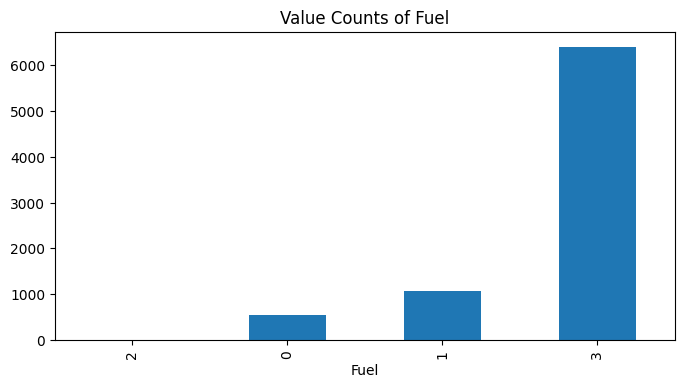

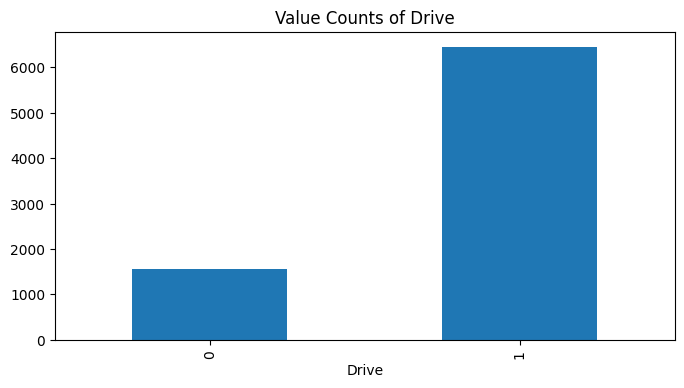

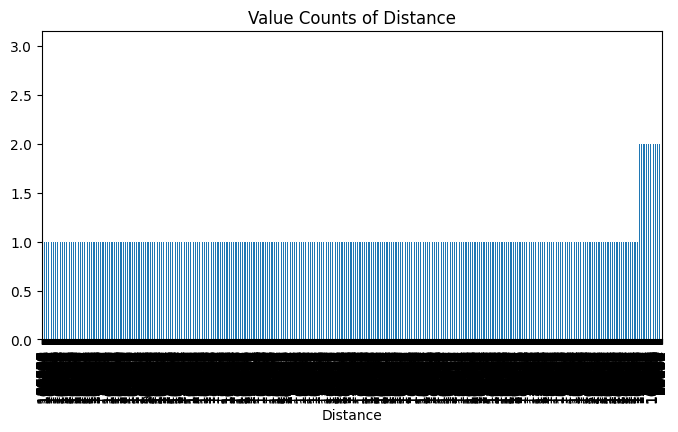

In [ ]:
columns_to_check = ['Fuel', 'Drive', 'Distance']
existing_columns = [col for col in columns_to_check if col in df.columns]

if existing_columns:
    object_columns = df[existing_columns]
    for column in object_columns:
        value_counts = df[column].value_counts(ascending=True)
        plt.subplots(1, 1, figsize=(8, 4))
        value_counts.plot(kind='bar')
        plt.title(f'Value Counts of {column}')
        plt.show()
else:
    print("None of the specified columns are present in the DataFrame.")

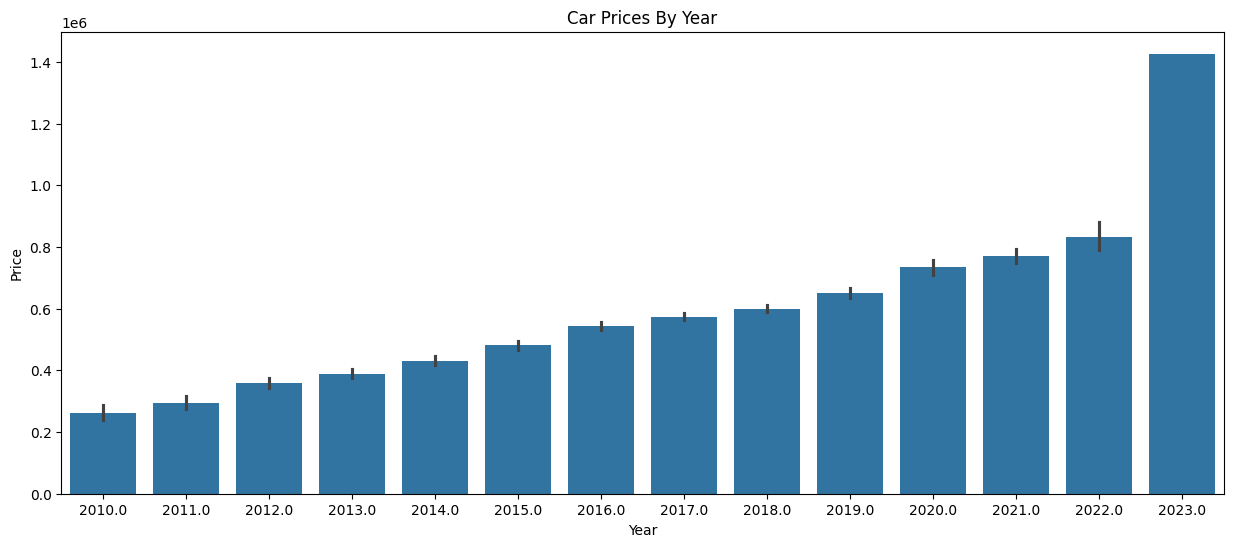

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(data=df,x=df['Year'],y=df['Price'])
plt.title("Car Prices By Year")
plt.show()

In [ ]:
df_numeric = df.drop(columns=['Car Name','Fuel','Location','Drive','Type'])

# Calculate correlation matrix
corel = df_numeric.corr()
print(corel)

            Unnamed: 0      Year  Distance     Owner     Price
Unnamed: 0    1.000000 -0.003654 -0.000674  0.019931 -0.006814
Year         -0.003654  1.000000 -0.371792 -0.212127  0.501978
Distance     -0.000674 -0.371792  1.000000  0.137670 -0.198950
Owner         0.019931 -0.212127  0.137670  1.000000 -0.149925
Price        -0.006814  0.501978 -0.198950 -0.149925  1.000000


<Axes: >

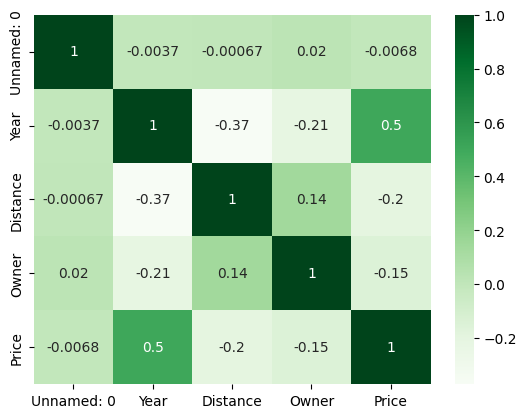

In [ ]:
sns.heatmap(corel, annot=True, cmap="Greens")

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

In [ ]:
# Build a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest R²: {r2_rf}")



Random Forest R²: 0.8482930342067037


y_test length: 1603
y_pred length: 1603


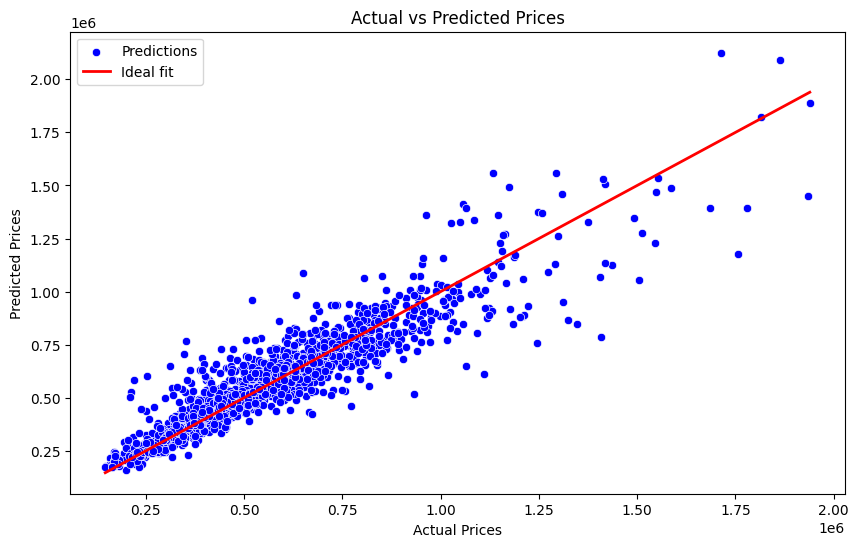

In [ ]:
# Ensure y_test and y_pred are of the same length
print(f'y_test length: {len(y_test)}')
print(f'y_pred length: {len(y_pred_rf)}')

# If there's a mismatch, slice y_test or y_pred to make sure they match
min_length = min(len(y_test), len(y_pred_rf))
y_test = y_test[:min_length]
y_pred_rf = y_pred_rf[:min_length]

# Now plot actual vs predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Ideal fit')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()


In [ ]:
# Build an XGBoost Regressor model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5, random_state=45)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)
print(f'Length of y_test: {len(y_test)}')
print(f'Length of y_pred_xgb: {len(y_pred_xgb)}')
# Find the minimum length between y_test and y_pred_xgb
min_length = min(len(y_test), len(y_pred_xgb))

# Slice both y_test and y_pred_xgb to the same length
y_test = y_test[:min_length]
y_pred_xgb = y_pred_xgb[:min_length]


r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost R²: {r2_xgb}")


Length of y_test: 1603
Length of y_pred_xgb: 1603
XGBoost R²: 0.8621491193771362


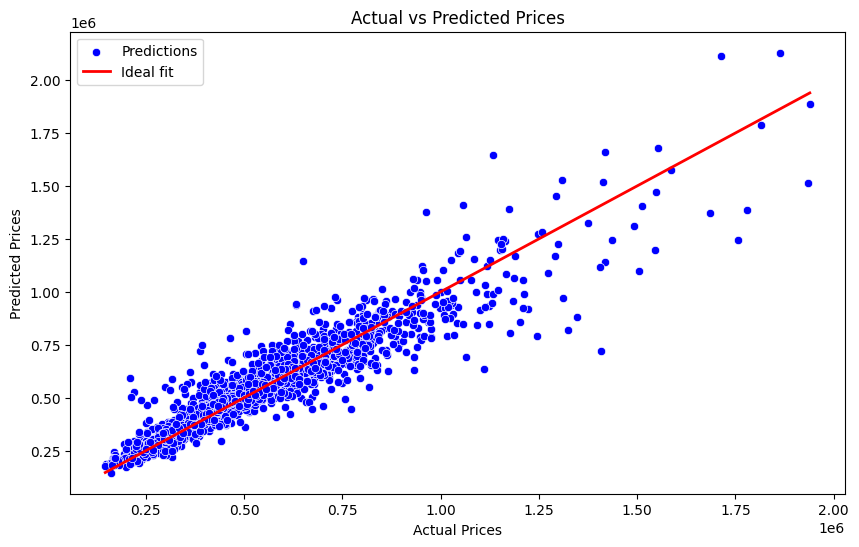

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_xgb, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Ideal fit')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()

In [ ]:
# Check for missing or infinite values in the dataset
print(X_train.isnull().sum())  # Check for missing values
print(X_train.isin([np.inf, -np.inf]).sum())  # Check for infinite values


Unnamed: 0    0
Car Name      1
Year          1
Distance      0
Owner         0
Fuel          0
Location      0
Drive         0
Type          0
dtype: int64
Unnamed: 0    0
Car Name      0
Year          0
Distance      0
Owner         0
Fuel          0
Location      0
Drive         0
Type          0
dtype: int64


In [ ]:
# Drop rows with missing or infinite values
X_train = X_train.replace([np.inf, -np.inf], np.nan)  # Replace infinite values with NaN
X_train = X_train.dropna()  # Drop rows with NaN values
y_train = y_train[X_train.index]  # Ensure target 'y_train' aligns with dropped rows


In [ ]:
# Impute missing or infinite values
X_train = X_train.replace([np.inf, -np.inf], np.nan)  # Replace infinite values with NaN
X_train = X_train.fillna(X_train.mean())  # Fill NaNs with the mean of the column

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Add a constant to the independent variables for the intercept
X = sm.add_constant(X)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing or infinite values in X_train
X_train = X_train.replace([np.inf, -np.inf], np.nan)  # Replace infinite values with NaN
X_train = X_train.dropna()  # Drop rows with NaN values
y_train = y_train[X_train.index]  # Ensure target 'y_train' aligns with dropped rows

# Fit the OLS model
ols_model = sm.OLS(y_train, X_train).fit()

# Make predictions on the test set
y_pred = ols_model.predict(X_test)

# Evaluate the model performance
test_mse = mean_squared_error(y_test, y_pred)

# Output the model summary and the MSE
print(ols_model.summary())
print(f"Test MSE: {test_mse:.2f}")


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     2685.
Date:                Wed, 04 Dec 2024   Prob (F-statistic):               0.00
Time:                        11:54:50   Log-Likelihood:                -84207.
No. Observations:                6411   AIC:                         1.684e+05
Df Residuals:                    6401   BIC:                         1.685e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.696e+07   1.31e+06    -20.573      0.0

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import catboost as cb
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
X = df.drop('Price', axis=1)  # Assuming 'price' is the target column
y = df['Price']

# Convert categorical features to 'category' data type if needed
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
X[categorical_features] = X[categorical_features].astype('category')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the CatBoost Regressor
model = cb.CatBoostRegressor(iterations=500, depth=10, learning_rate=0.1, loss_function='RMSE', cat_features=categorical_features, verbose=100)

# Train the model
model.fit(X_train, y_train)

0:	learn: 249651.4675926	total: 126ms	remaining: 1m 2s
100:	learn: 82463.5770494	total: 4.04s	remaining: 16s
200:	learn: 64388.0151133	total: 8.28s	remaining: 12.3s
300:	learn: 52066.7371343	total: 12.8s	remaining: 8.49s
400:	learn: 44524.2130919	total: 18s	remaining: 4.45s
499:	learn: 38382.3595971	total: 21.5s	remaining: 0us


R2 Score: 0.8663745778689079


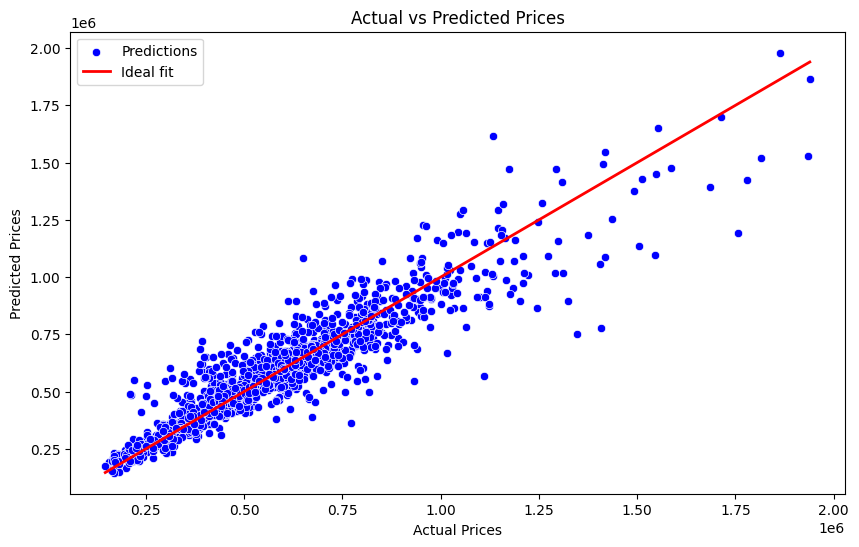

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using RMSE and R2 score
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')
# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Ideal fit')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()

In [ ]:
!pip install lightgbm

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Define features and target
X = df.drop('Price', axis=1)  # Assuming 'price' is the target column
y = df['Price']

# Clean feature names by replacing special characters
X.columns = X.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the LightGBM Regressor
model = lgb.LGBMRegressor(boosting_type='gbdt', num_leaves=31, learning_rate=0.05, n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


r2 = r2_score(y_test, y_pred)

print(f'R2 Score: {r2}')



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001360 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 875
[LightGBM] [Info] Number of data points in the train set: 6412, number of used features: 9
[LightGBM] [Info] Start training from score 577043.379601
R2 Score: 0.8548184370620966


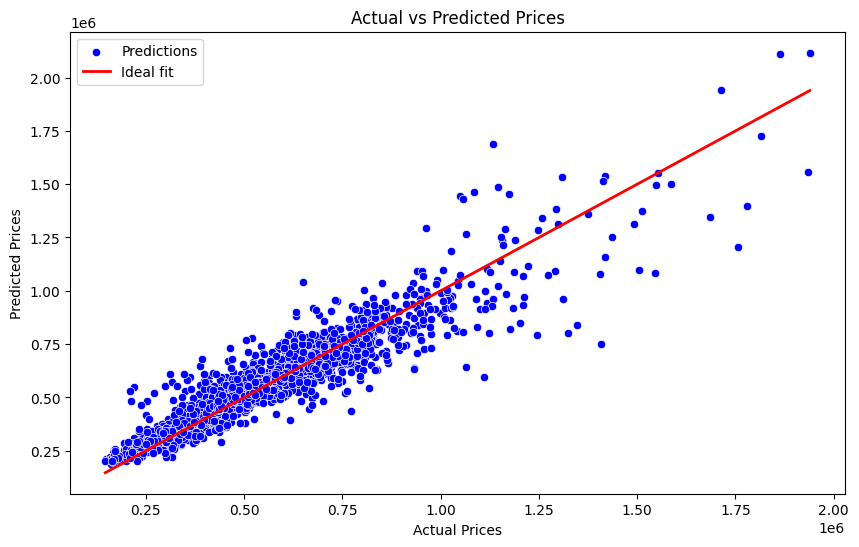

In [ ]:
# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Ideal fit')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()

In [ ]:
pip install pandas numpy scikit-learn matplotlib seaborn

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Define features and target
x= df.drop('Price', axis=1)  # Assuming 'price' is the target column
y = df['Price']
x = df.drop('Price', axis=1)
y = df['Price']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Create an imputer object
x_train = imputer.fit_transform(x_train)  # Fit and transform on training data
x_test = imputer.transform(x_test)
# Initialize the Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')

R² Score: 0.7836058906918748


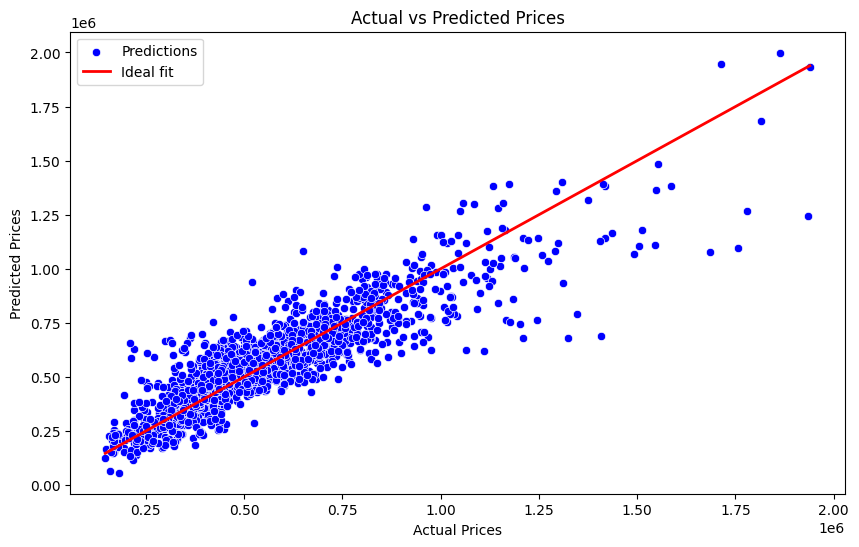

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Ideal fit')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()